In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def read_info(fn):

    # read the entire file into a python array
    with open(fn, 'rb') as f:
        data = f.readlines()

    # remove the trailing "\n" from each line
    data = map(lambda x: x.rstrip(), data)

    # each element of 'data' is an individual JSON object.
    # have all the individual business JSON objects
    data_json_str = "[" + ','.join(data) + "]"

    # now, load it into pandas
    data_df = pd.read_json(data_json_str)
    data_df.columns = [x.lower() for x in data_df.columns]
    
    return data_df

In [3]:
DATA_DUMP = './info_large.txt'

In [4]:
# read in the json created by scrape.py
d = read_info(DATA_DUMP)

In [5]:
# randomize the order of routes
# not ideal but okay
d = d.sample(frac=1)

In [6]:
# print route name column out to file
# route name RNN can train on this
# d['name'].to_csv('./data/route_name.txt', encoding = 'utf8', index = False)

In [7]:
col = ['name' ,'description', 'type', 'protection',
       'rateyds', 'ratehueco',
       'page views', 'starvotes', 'staraverage']
d[col].head(10)

,name,description,type,protection,rateyds,ratehueco,page views,starvotes,staraverage
64806,Minas Tirith,NaN,"TR, 1 pitch, 70'",NaN,5.11b,NaN,224,1,2.0
26164,Wanted Man,Fun and varied climbing. The start can go one...,"Trad, 2 pitches, 175'","Standard rack to 3""",5.9+,NaN,12,3,2.7
67208,Triple Word,crux after pulling steep section,"Sport, 1 pitch, 60'",draws,5.11a,NaN,7,2,1.5
33612,Case of the Fags,Start in the obvious dihedral for 15 feet to a...,"Trad, 1 pitch, 65'",The bottom corner is two inches. The wide sec...,5.11+,NaN,"1,400",2,1.5
53957,Project,Route D: An extended finish to A and also a st...,Boulder,Pads,NaN,V-easy,41,1,3.0
79242,Grey Face,P1 - Climb up the crack (crux ?) and continue...,"Trad, 2 pitches, 200'",Normal rack,5.5,NaN,32,2,3.0
7093,Give It a Burl,crux is between 1st and 2nd clip on good two p...,"Sport, 40'",rap anchors and bolts,5.10,NaN,277,2,1.5
17507,Jumping Jehosephat,Follow the direction to reach the Locomotion R...,"Trad, 1 pitch, 40'",Mostly hand-sized. Carry a standard rack of ca...,5.7,NaN,"1,868",78,1.7
18390,Hammer and Anvil,Low-angle face past a bolt gains a short crack...,"Trad, 1 pitch, 30'","1 bolt (1/2""), gear to 2"", bolted anchor/rap",5.4,NaN,165,1,1.0
38739,No Tomorrow,Start just right of Farts of Horsemen and asce...,"Sport, 1 pitch",Ten or so draws and a rope.,5.12b,NaN,502,2,2.5


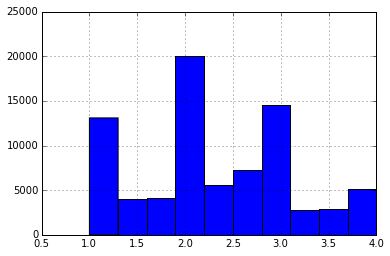

In [8]:
d['staraverage'].hist() # significant heaping

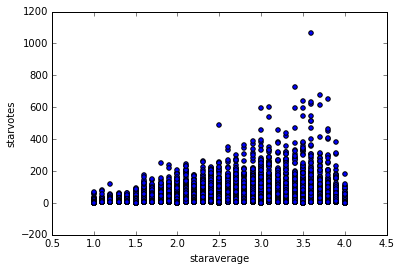

In [10]:
d.plot(kind='scatter', x='staraverage', y='starvotes')